# Titanic 
Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The RMS Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. The Titanic was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, her architect, died in the disaster.

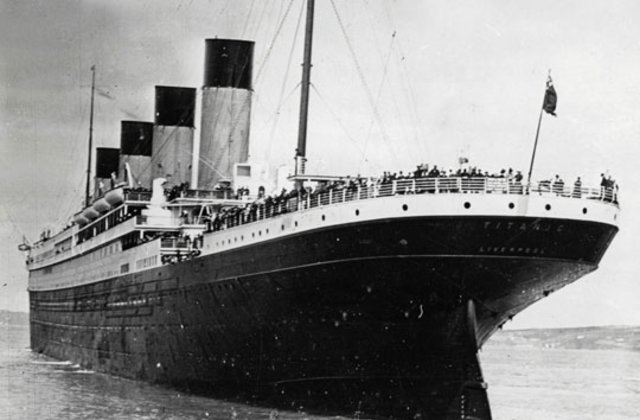

In [29]:
# Insert the image 
from IPython.display import Image
Image(filename='C:/Users/Nemgeree Armanonah/Documents/GitHub/Titanic/images/ship.jpeg')

## Import the Necessary Libraries

In [40]:
# Importing 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the Data from Dataset

In [33]:
data = pd.read_csv('./titanic datasets/train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Exploring Data

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### The training-set has 891 examples and 11 features + the target variable (survived). 2 of the features are floats, 5 are integers and 5 are objects. Below I have listed the features with a short description

### List All Features

In [36]:
data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

###  What features could contribute to a high survival rate ?

To Us it would make sense if everything except ‘PassengerId’, ‘Ticket’ and ‘Name’ would be correlated with a high survival rate.

### 1. Age & Sex

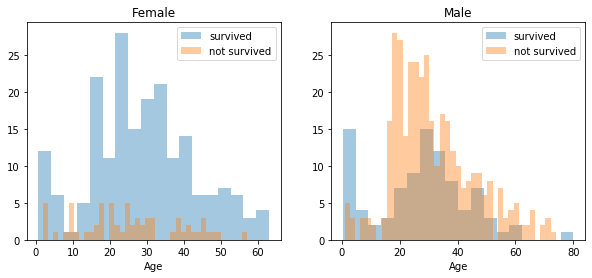

In [41]:
# Variables
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = data[data['Sex']=='female']
men = data[data['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

#### You can see that men have a high probability of survival when they are between 18 and 30 years old, which is also a little bit true for women but not fully. For women the survival chances are higher between 14 and 40.

#### For men the probability of survival is very low between the age of 5 and 18, but that isn’t true for women. Another thing to note is that infants also have a little bit higher probability of survival

In [8]:
def handle_non_numerical_data(df):
    
    columns = df.columns.values

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        #print(column,df[column].dtype)
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            
            column_contents = df[column].values.tolist()
            #finding just the uniques
            unique_elements = set(column_contents)
            # great, found them. 
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            df[column] = list(map(convert_to_int,df[column]))

    return df

In [9]:
y_target = data['Survived']
# Y_target.reshape(len(Y_target),1)
x_train = data[['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare','Embarked', 'Ticket']]

x_train = handle_non_numerical_data(x_train)
x_train.head()

c:\users\nemgeree armanonah\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked,Ticket
0,3,22.0,1,1,0,7.2500,1,311
1,1,38.0,0,1,0,71.2833,2,575
2,3,26.0,0,0,0,7.9250,1,637
3,1,35.0,0,1,0,53.1000,1,222
4,3,35.0,1,0,0,8.0500,1,289


In [10]:
fare = pd.DataFrame(x_train['Fare'])
# Normalizing
min_max_scaler = preprocessing.MinMaxScaler()
newfare = min_max_scaler.fit_transform(fare)
x_train['Fare'] = newfare
x_train

c:\users\nemgeree armanonah\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked,Ticket
0,3,22.0,1,1,0,0.014151,1,311
1,1,38.0,0,1,0,0.139136,2,575
2,3,26.0,0,0,0,0.015469,1,637
3,1,35.0,0,1,0,0.103644,1,222
4,3,35.0,1,0,0,0.015713,1,289
...,...,...,...,...,...,...,...,...
886,2,27.0,1,0,0,0.025374,1,635
887,1,19.0,0,0,0,0.058556,1,364
888,3,NaN,0,1,2,0.045771,1,221
889,1,26.0,1,0,0,0.058556,2,384


In [11]:
x_train.isnull().sum()

Pclass        0
Age         177
Sex           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Ticket        0
dtype: int64

In [12]:
# Fill the NAN values with the median values in the datasets
x_train['Age'] = x_train['Age'].fillna(x_train['Age'].median())
print("Number of NULL values" , x_train['Age'].isnull().sum())
print(x_train.head(20))

Number of NULL values 0
    Pclass   Age  Sex  SibSp  Parch      Fare  Embarked  Ticket
0        3  22.0    1      1      0  0.014151         1     311
1        1  38.0    0      1      0  0.139136         2     575
2        3  26.0    0      0      0  0.015469         1     637
3        1  35.0    0      1      0  0.103644         1     222
4        3  35.0    1      0      0  0.015713         1     289
5        3  28.0    1      0      0  0.016510         3     212
6        1  54.0    1      0      0  0.101229         1     367
7        3   2.0    1      3      1  0.041136         1     131
8        3  27.0    0      0      2  0.021731         1     563
9        2  14.0    0      1      0  0.058694         2     344
10       3   4.0    0      1      1  0.032596         1     283
11       1  58.0    0      0      0  0.051822         1     663
12       3  20.0    1      0      0  0.015713         1     187
13       3  39.0    1      1      5  0.061045         1     492
14       3  14.0

c:\users\nemgeree armanonah\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
x_train.isnull().sum()

Pclass      0
Age         0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Ticket      0
dtype: int64

In [14]:
x_train['Sex'] = x_train['Sex'].replace('male', 0)
x_train['Sex'] = x_train['Sex'].replace('female', 1)
# print(type(x_train))
corr = x_train.corr()
corr.style.background_gradient()

c:\users\nemgeree armanonah\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\nemgeree armanonah\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked,Ticket
Pclass,1,-0.339898,0.1319,0.0830814,0.0184427,-0.5495,0.0509918,0.0269485
Age,-0.339898,1,0.0811625,-0.233296,-0.172482,0.0966884,-0.0146988,-0.0370495
Sex,0.1319,0.0811625,1,-0.114631,-0.245489,-0.182333,-0.111249,-0.00908448
SibSp,0.0830814,-0.233296,-0.114631,1,0.414838,0.159651,-0.0580079,0.0789259
Parch,0.0184427,-0.172482,-0.245489,0.414838,1,0.216225,-0.0766254,0.107004
Fare,-0.5495,0.0966884,-0.182333,0.159651,0.216225,1,0.0584624,0.0468655
Embarked,0.0509918,-0.0146988,-0.111249,-0.0580079,-0.0766254,0.0584624,1,-0.00115836
Ticket,0.0269485,-0.0370495,-0.00908448,0.0789259,0.107004,0.0468655,-0.00115836,1


In [15]:
def plot_corr(df,size=10):


    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
# plot_corr(x_train)
x_train.corr()
corr.style.background_gradient()

,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked,Ticket
Pclass,1,-0.339898,0.1319,0.0830814,0.0184427,-0.5495,0.0509918,0.0269485
Age,-0.339898,1,0.0811625,-0.233296,-0.172482,0.0966884,-0.0146988,-0.0370495
Sex,0.1319,0.0811625,1,-0.114631,-0.245489,-0.182333,-0.111249,-0.00908448
SibSp,0.0830814,-0.233296,-0.114631,1,0.414838,0.159651,-0.0580079,0.0789259
Parch,0.0184427,-0.172482,-0.245489,0.414838,1,0.216225,-0.0766254,0.107004
Fare,-0.5495,0.0966884,-0.182333,0.159651,0.216225,1,0.0584624,0.0468655
Embarked,0.0509918,-0.0146988,-0.111249,-0.0580079,-0.0766254,0.0584624,1,-0.00115836
Ticket,0.0269485,-0.0370495,-0.00908448,0.0789259,0.107004,0.0468655,-0.00115836,1


# Categorizing The Columns 

In [16]:
# Dividing the data into train and test data set
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_target, test_size = 0.4, random_state = 40)

In [17]:
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)


c:\users\nemgeree armanonah\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
print(clf.predict(X_test))
print("Accuracy: ",clf.score(X_test, Y_test))

[0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0
 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1
 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1
 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1
 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0
 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0
 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1
 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0]
Accuracy:  0.8151260504201681


In [22]:
## Testing the model.
test_data = pd.read_csv('./titanic datasets/test.csv')
test_data.head(3)
# test_data.isnull().sum()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [23]:
### Preprocessing on the test data
test_data = test_data[['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare', 'Ticket', 'Embarked']]
test_data = handle_non_numerical_data(test_data)

fare = pd.DataFrame(test_data['Fare'])
min_max_scaler = preprocessing.MinMaxScaler()
newfare = min_max_scaler.fit_transform(fare)
test_data['Fare'] = newfare
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Sex'] = test_data['Sex'].replace('male', 0)
test_data['Sex'] = test_data['Sex'].replace('female', 1)
print(test_data.head())

   Pclass   Age  Sex  SibSp  Parch      Fare  Ticket  Embarked
0       3  34.5    1      0      0  0.015282     359         2
1       3  47.0    0      1      0  0.013663     206         0
2       2  62.0    1      0      0  0.018909     183         2
3       3  27.0    1      0      0  0.016908     156         0
4       3  22.0    0      1      1  0.023984     339         0


In [24]:
print(clf.predict(test_data))


[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
